[View in Colaboratory](https://colab.research.google.com/github/Santosh-Gupta/Research2Vec/blob/master/Research2VecPublicPlayGround.ipynb)

UPDATE 9-20-18

I have a new version, which so far looks to be giving much better results. Link to new version. 

https://github.com/Santosh-Gupta/Research2Vec/blob/master/Research2VecPublicPlayGroundVersion2.ipynb

↓↓↓  Stuff you don't have to touch (unless you want to) just run it ↓↓↓ This will download the Tensorflow Model (2 GB) and necessary Python dictionaries into your Colab environment. 

In [2]:
#SECTION 1

import re
from collections import Counter
import time
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pyplot
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
from urllib.request import urlretrieve
from os.path import isfile, isdir
import keras
import requests
import pickle
!pip install https://github.com/Phlya/adjustText/archive/master.zip
import importlib
import adjustText
importlib.reload(adjustText)
from adjustText import adjust_text

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                
download_file_from_google_drive('15_inqIvXBnaC5mI_GPxLnV8Va8hxIqAM', 'model.zip') #using cbow 2 inputs

if not os.path.exists('MODEL'):
    os.makedirs('MODEL')

# UNZIP ZIP
print("Uncompressing zip file")
zip_ref = zipfile.ZipFile('model.zip', 'r')
zip_ref.extractall('MODEL/')
zip_ref.close()

print( os.getcwd() )
print( os.listdir('./MODEL') )

download_file_from_google_drive('1mdF0JfrzbOxeHD26JaUW8KEfIdMEHzQG', 'titleDict.pickle')

with open('titleDict.pickle', 'rb') as handle:
    titleDict = pickle.load(handle)
    
download_file_from_google_drive('12fiWctMsUJbmq0JaT3H8Zh23GdtxZThh', 'idDict.pickle')

with open('idDict.pickle', 'rb') as handle:
    idDict = pickle.load(handle)
    
download_file_from_google_drive('1xOF1qw6B0Sl63ROovlBDU4DbfaJbplxY', 'linkDict.pickle')

with open('linkDict.pickle', 'rb') as handle:
    linkDict = pickle.load(handle)
    
with tf.Session() as sess:
  saver = tf.train.import_meta_graph('./MODEL/Research2VecEmbedSize80.ckpt.meta')
  saver.restore(sess, './MODEL/Research2VecEmbedSize80.ckpt' )

  embeddings = tf.get_default_graph().get_tensor_by_name('embeddings:0') 
  softmax_weights = tf.get_default_graph().get_tensor_by_name('softmax_weights:0') 
  
  normSM = tf.sqrt(tf.reduce_sum(tf.square(softmax_weights), 1, keepdims=True))
  normalized_embeddingsSM = softmax_weights / normSM
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  
  final_embeddings = normalized_embeddings.eval()
  final_embeddingsSM = normalized_embeddingsSM.eval()
  



Using TensorFlow backend.


     - 3.2MB 75.6MB/s
  Running setup.py bdist_wheel for adjustText ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-_mhbtnrk/wheels/7a/56/aa/ee86b18565ad149ba3a5470b55bbc5081701fd0b57141ed055
Successfully built adjustText
Uncompressing zip file
/content
['Research2VecEmbedSize80.ckpt.meta', 'Research2VecEmbedSize80.ckpt.index', 'Research2VecEmbedSize80.ckpt.data-00000-of-00001', 'checkpoint']
INFO:tensorflow:Restoring parameters from ./MODEL/Research2VecEmbedSize80.ckpt


^^^ Stuff you don't have to touch (unless you want to) just run it ^^^

In [3]:
#Section 2

#Use https://www.semanticscholar.org to first find papers you want to analyze, then 'titlePhrase' to find the paper in this recommender.  

titlePhrase = 'lstm recurrent networks'  
lines = []
for i in titleDict:
  if type(titleDict[i]) is str:
    if str.lower(titlePhrase) in str.lower(titleDict[i]) :
        lines.append(i)
print("Number of results ", len(lines))
for j in lines:
  print("EMBED ID:", j, "| TITLE:", titleDict[j], "| LINK:",  linkDict[j] )
  

Number of results  3
EMBED ID: 140393 | TITLE: Finding temporal structure in music: blues improvisation with LSTM recurrent networks | LINK: https://semanticscholar.org/paper/60c36d469c48541ec06f92cf982de0f7e12093cf
EMBED ID: 344093 | TITLE: Learning Precise Timing with LSTM Recurrent Networks | LINK: https://semanticscholar.org/paper/047655e733a9eed9a500afd916efa566915b9110
EMBED ID: 1418824 | TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112


In [0]:
#Section 3

idString = '80fc283900e930a8ab5d7b525f258cf620b9bf8e'  
lines = []
for i in idDict:
  if type(idDict[i]) is str:
    if idString in str.lower(idDict[i]) :
        lines.append(i)
for j in lines:
  print(idString)
  print("EMBED ID:", j, "| TITLE:", titleDict[j], "| LINK:",  linkDict[j] )

In [9]:
#Section 4

NumberOfPapers = 100  #Number of most similar papers to view and analyze in TSNE

#Set the embedID's of the paper(s) you want analyzed. 
paper1EmbedID = 1621681   #TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
paper2EmbedID = 431721 # TITLE: Convolutional Neural Networks for Sentence Classification | LINK: https://semanticscholar.org/paper/398dee13b3aaaefdf14c78cc1e00dcf265795fd3
paper3EmbedID = 244279  #TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
paper4EmbedID = 1418824 # TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112

# ↓↓↓ You can adjust this to use any number of combined papers ↓↓↓

paper1 = np.take(final_embeddings, paper1EmbedID , axis=0)   
paper2 = np.take(final_embeddings, paper2EmbedID , axis=0) 
paper3 = np.take(final_embeddings, paper3EmbedID , axis=0)   
paper4 = np.take(final_embeddings, paper4EmbedID , axis=0) 

extracted_v = paper1#+ paper2 + paper3 + paper4  #Don't need to average since vectors are normalized 

# ^^^ You can adjust this to use any number of combined papers ^^^

dotprods_v = np.matmul(extracted_v, np.transpose(final_embeddings))

nearestPapers = (-dotprods_v).argsort()[0:NumberOfPapers]

for k in range(0, NumberOfPapers):
  print("EMBED ID:", nearestPapers[k], "| TITLE:", titleDict[nearestPapers[k]], "| LINK:",  linkDict[nearestPapers[k]] )

EMBED ID: 1621681 | TITLE: Relational Reinforcement Learning | LINK: https://semanticscholar.org/paper/242f17d3fc8364eeb09303cb91e89f7b53dbd702
EMBED ID: 752738 | TITLE: Overview on decentralized establishment of consistent multi-lateral collaborations based on asynchronous communication | LINK: https://semanticscholar.org/paper/2cb5e9be5a65dd9726a0f0bbd723d9cf72f0ff05
EMBED ID: 1614888 | TITLE: Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition | LINK: https://semanticscholar.org/paper/0b036ba37045e3258a5446ff1380074d9cd1b679
EMBED ID: 388660 | TITLE: Feature-based methods for large scale dynamic programming | LINK: https://semanticscholar.org/paper/1e8745322c1ab89b8a9cdcfaa0d39c5db1dc5fcd
EMBED ID: 12925 | TITLE: A Practical Approach to Appliance Load Control Analysis: A Water Heater Case Study | LINK: https://semanticscholar.org/paper/15f223cc24d1cede06405957288737aa8a4b1268
EMBED ID: 683503 | TITLE: Transfer in Reinforcement Learning: a Framework and a S

In [10]:
#Section 4

NumberOfPapers = 100  #Number of most similar papers to view and analyze in TSNE

#Set the embedID's of the paper(s) you want analyzed. 
paper1EmbedID = 1621681   #TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
paper2EmbedID = 431721 # TITLE: Convolutional Neural Networks for Sentence Classification | LINK: https://semanticscholar.org/paper/398dee13b3aaaefdf14c78cc1e00dcf265795fd3
paper3EmbedID = 244279  #TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
paper4EmbedID = 1418824 # TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112

# ↓↓↓ You can adjust this to use any number of combined papers ↓↓↓

paper1 = np.take(final_embeddingsSM, paper1EmbedID , axis=0)   
paper2 = np.take(final_embeddingsSM, paper2EmbedID , axis=0) 
paper3 = np.take(final_embeddingsSM, paper3EmbedID , axis=0)   
paper4 = np.take(final_embeddingsSM, paper4EmbedID , axis=0) 

extracted_v = paper1 #+ paper2 + paper3 + paper4  #Don't need to average since vectors are normalized 

# ^^^ You can adjust this to use any number of combined papers ^^^

dotprods_v = np.matmul(extracted_v, np.transpose(final_embeddingsSM))

nearestPapers = (-dotprods_v).argsort()[0:NumberOfPapers]

for k in range(0, NumberOfPapers):
  print("EMBED ID:", nearestPapers[k], "| TITLE:", titleDict[nearestPapers[k]], "| LINK:",  linkDict[nearestPapers[k]] )

EMBED ID: 1621681 | TITLE: Relational Reinforcement Learning | LINK: https://semanticscholar.org/paper/242f17d3fc8364eeb09303cb91e89f7b53dbd702
EMBED ID: 1131696 | TITLE: Speeding Up Relational Reinforcement Learning through the Use of an Incremental First Order Decision Tree Learner | LINK: https://semanticscholar.org/paper/3d03eb4a49cc95c60b15bd048155dbb9d0f89677
EMBED ID: 109029 | TITLE: A Survey of Reinforcement Learning in Relational Domains | LINK: https://semanticscholar.org/paper/1b4471121868c9774aba82d81cb3af75963aeedd
EMBED ID: 371694 | TITLE: Statistical Relational Artificial Intelligence: From Distributions through Actions to Optimization | LINK: https://semanticscholar.org/paper/787a166cad1f1f0ff25d4b5e3c63559b8bae14f0
EMBED ID: 734462 | TITLE: Relational Reinforcement Learning An Overview | LINK: https://semanticscholar.org/paper/e514e7e57a6c7b912a062e0a8756dc3c060bbe0c
EMBED ID: 846292 | TITLE: Scaling Up Reinforcement Learning with a Relational Representation | LINK: ht

In [11]:
#Section 4

NumberOfPapers = 100  #Number of most similar papers to view and analyze in TSNE

#Set the embedID's of the paper(s) you want analyzed. 
paper1EmbedID = 1621681   #TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
paper2EmbedID = 431721 # TITLE: Convolutional Neural Networks for Sentence Classification | LINK: https://semanticscholar.org/paper/398dee13b3aaaefdf14c78cc1e00dcf265795fd3
paper3EmbedID = 244279  #TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
paper4EmbedID = 1418824 # TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112

# ↓↓↓ You can adjust this to use any number of combined papers ↓↓↓

paper1 = np.take(final_embeddingsSM, paper1EmbedID , axis=0)   
paper2 = np.take(final_embeddingsSM, paper2EmbedID , axis=0) 
paper3 = np.take(final_embeddingsSM, paper3EmbedID , axis=0)   
paper4 = np.take(final_embeddingsSM, paper4EmbedID , axis=0) 

extracted_v = paper1 #+ paper2 + paper3 + paper4  #Don't need to average since vectors are normalized 

# ^^^ You can adjust this to use any number of combined papers ^^^

dotprods_v = np.matmul(extracted_v, np.transpose(final_embeddings))

nearestPapers = (-dotprods_v).argsort()[0:NumberOfPapers]

for k in range(0, NumberOfPapers):
  print("EMBED ID:", nearestPapers[k], "| TITLE:", titleDict[nearestPapers[k]], "| LINK:",  linkDict[nearestPapers[k]] )

EMBED ID: 734462 | TITLE: Relational Reinforcement Learning An Overview | LINK: https://semanticscholar.org/paper/e514e7e57a6c7b912a062e0a8756dc3c060bbe0c
EMBED ID: 1621681 | TITLE: Relational Reinforcement Learning | LINK: https://semanticscholar.org/paper/242f17d3fc8364eeb09303cb91e89f7b53dbd702
EMBED ID: 921041 | TITLE: Transfer Learning via Inter-Task Mappings for Temporal Difference Learning | LINK: https://semanticscholar.org/paper/b3412ded0375f8fe7336e82dc534eed994cac088
EMBED ID: 321584 | TITLE: Planning under Uncertainty in Complex Structured Environments a Dissertation Submitted to the Department of Computer Science and the Committee on Graduate Studies of Stanford University in Partial Fulfillment of the Requirements for the Degree of Doctor of Philosophy | LINK: https://semanticscholar.org/paper/3983ec4133864976a6d05bb8ded471cee67d7e83
EMBED ID: 109029 | TITLE: A Survey of Reinforcement Learning in Relational Domains | LINK: https://semanticscholar.org/paper/1b4471121868c97

In [12]:
#Section 4

NumberOfPapers = 100  #Number of most similar papers to view and analyze in TSNE

#Set the embedID's of the paper(s) you want analyzed. 
paper1EmbedID = 1621681   #TITLE: Skip-Thought Vectors | LINK: https://semanticscholar.org/paper/d3bbd57899d938e8c4bcafbbda10ceb59638e4db
paper2EmbedID = 431721 # TITLE: Convolutional Neural Networks for Sentence Classification | LINK: https://semanticscholar.org/paper/398dee13b3aaaefdf14c78cc1e00dcf265795fd3
paper3EmbedID = 244279  #TITLE: Distributed Representations of Sentences and Documents | LINK: https://semanticscholar.org/paper/1510cf4b8abea80b9f352325ca4c132887de21a0
paper4EmbedID = 1418824 # TITLE: Incremental sentence compression using LSTM recurrent networks | LINK: https://semanticscholar.org/paper/4720f79749d740e18bed4ade8d6b6b742c9dc112

# ↓↓↓ You can adjust this to use any number of combined papers ↓↓↓

paper1 = np.take(final_embeddings, paper1EmbedID , axis=0)   
paper2 = np.take(final_embeddings, paper2EmbedID , axis=0) 
paper3 = np.take(final_embeddings, paper3EmbedID , axis=0)   
paper4 = np.take(final_embeddings, paper4EmbedID , axis=0) 

extracted_v = paper1 #+ paper2 + paper3 + paper4  #Don't need to average since vectors are normalized 

# ^^^ You can adjust this to use any number of combined papers ^^^

dotprods_v = np.matmul(extracted_v, np.transpose(final_embeddingsSM))

nearestPapers = (-dotprods_v).argsort()[0:NumberOfPapers]

for k in range(0, NumberOfPapers):
  print("EMBED ID:", nearestPapers[k], "| TITLE:", titleDict[nearestPapers[k]], "| LINK:",  linkDict[nearestPapers[k]] )

EMBED ID: 1068805 | TITLE: Relational temporal difference learning | LINK: https://semanticscholar.org/paper/187a56165ae1285d03f01ee6e5fdaddd4dfe40d8
EMBED ID: 1621681 | TITLE: Relational Reinforcement Learning | LINK: https://semanticscholar.org/paper/242f17d3fc8364eeb09303cb91e89f7b53dbd702
EMBED ID: 1116700 | TITLE: Multi-Agent Relational Reinforcement Learning Explorations in Multi-State Coordination Tasks | LINK: https://semanticscholar.org/paper/1f251e176971eded219d90f0659ff7529de35848
EMBED ID: 846292 | TITLE: Scaling Up Reinforcement Learning with a Relational Representation | LINK: https://semanticscholar.org/paper/08ee8809beb262effbaa105c6f38bef45d30c48b
EMBED ID: 1653670 | TITLE: Multi-agent Relational Reinforcement Learning | LINK: https://semanticscholar.org/paper/510dd3ce432b545ef622bf04ef13f4d66ac0e896
EMBED ID: 1443848 | TITLE: The Effects of Motivation on Habitual Instrumental Behavior | LINK: https://semanticscholar.org/paper/abbc5d71cf3a93dcca1dce264e6d2a1ccef25316
E

KeyboardInterrupt: ignored

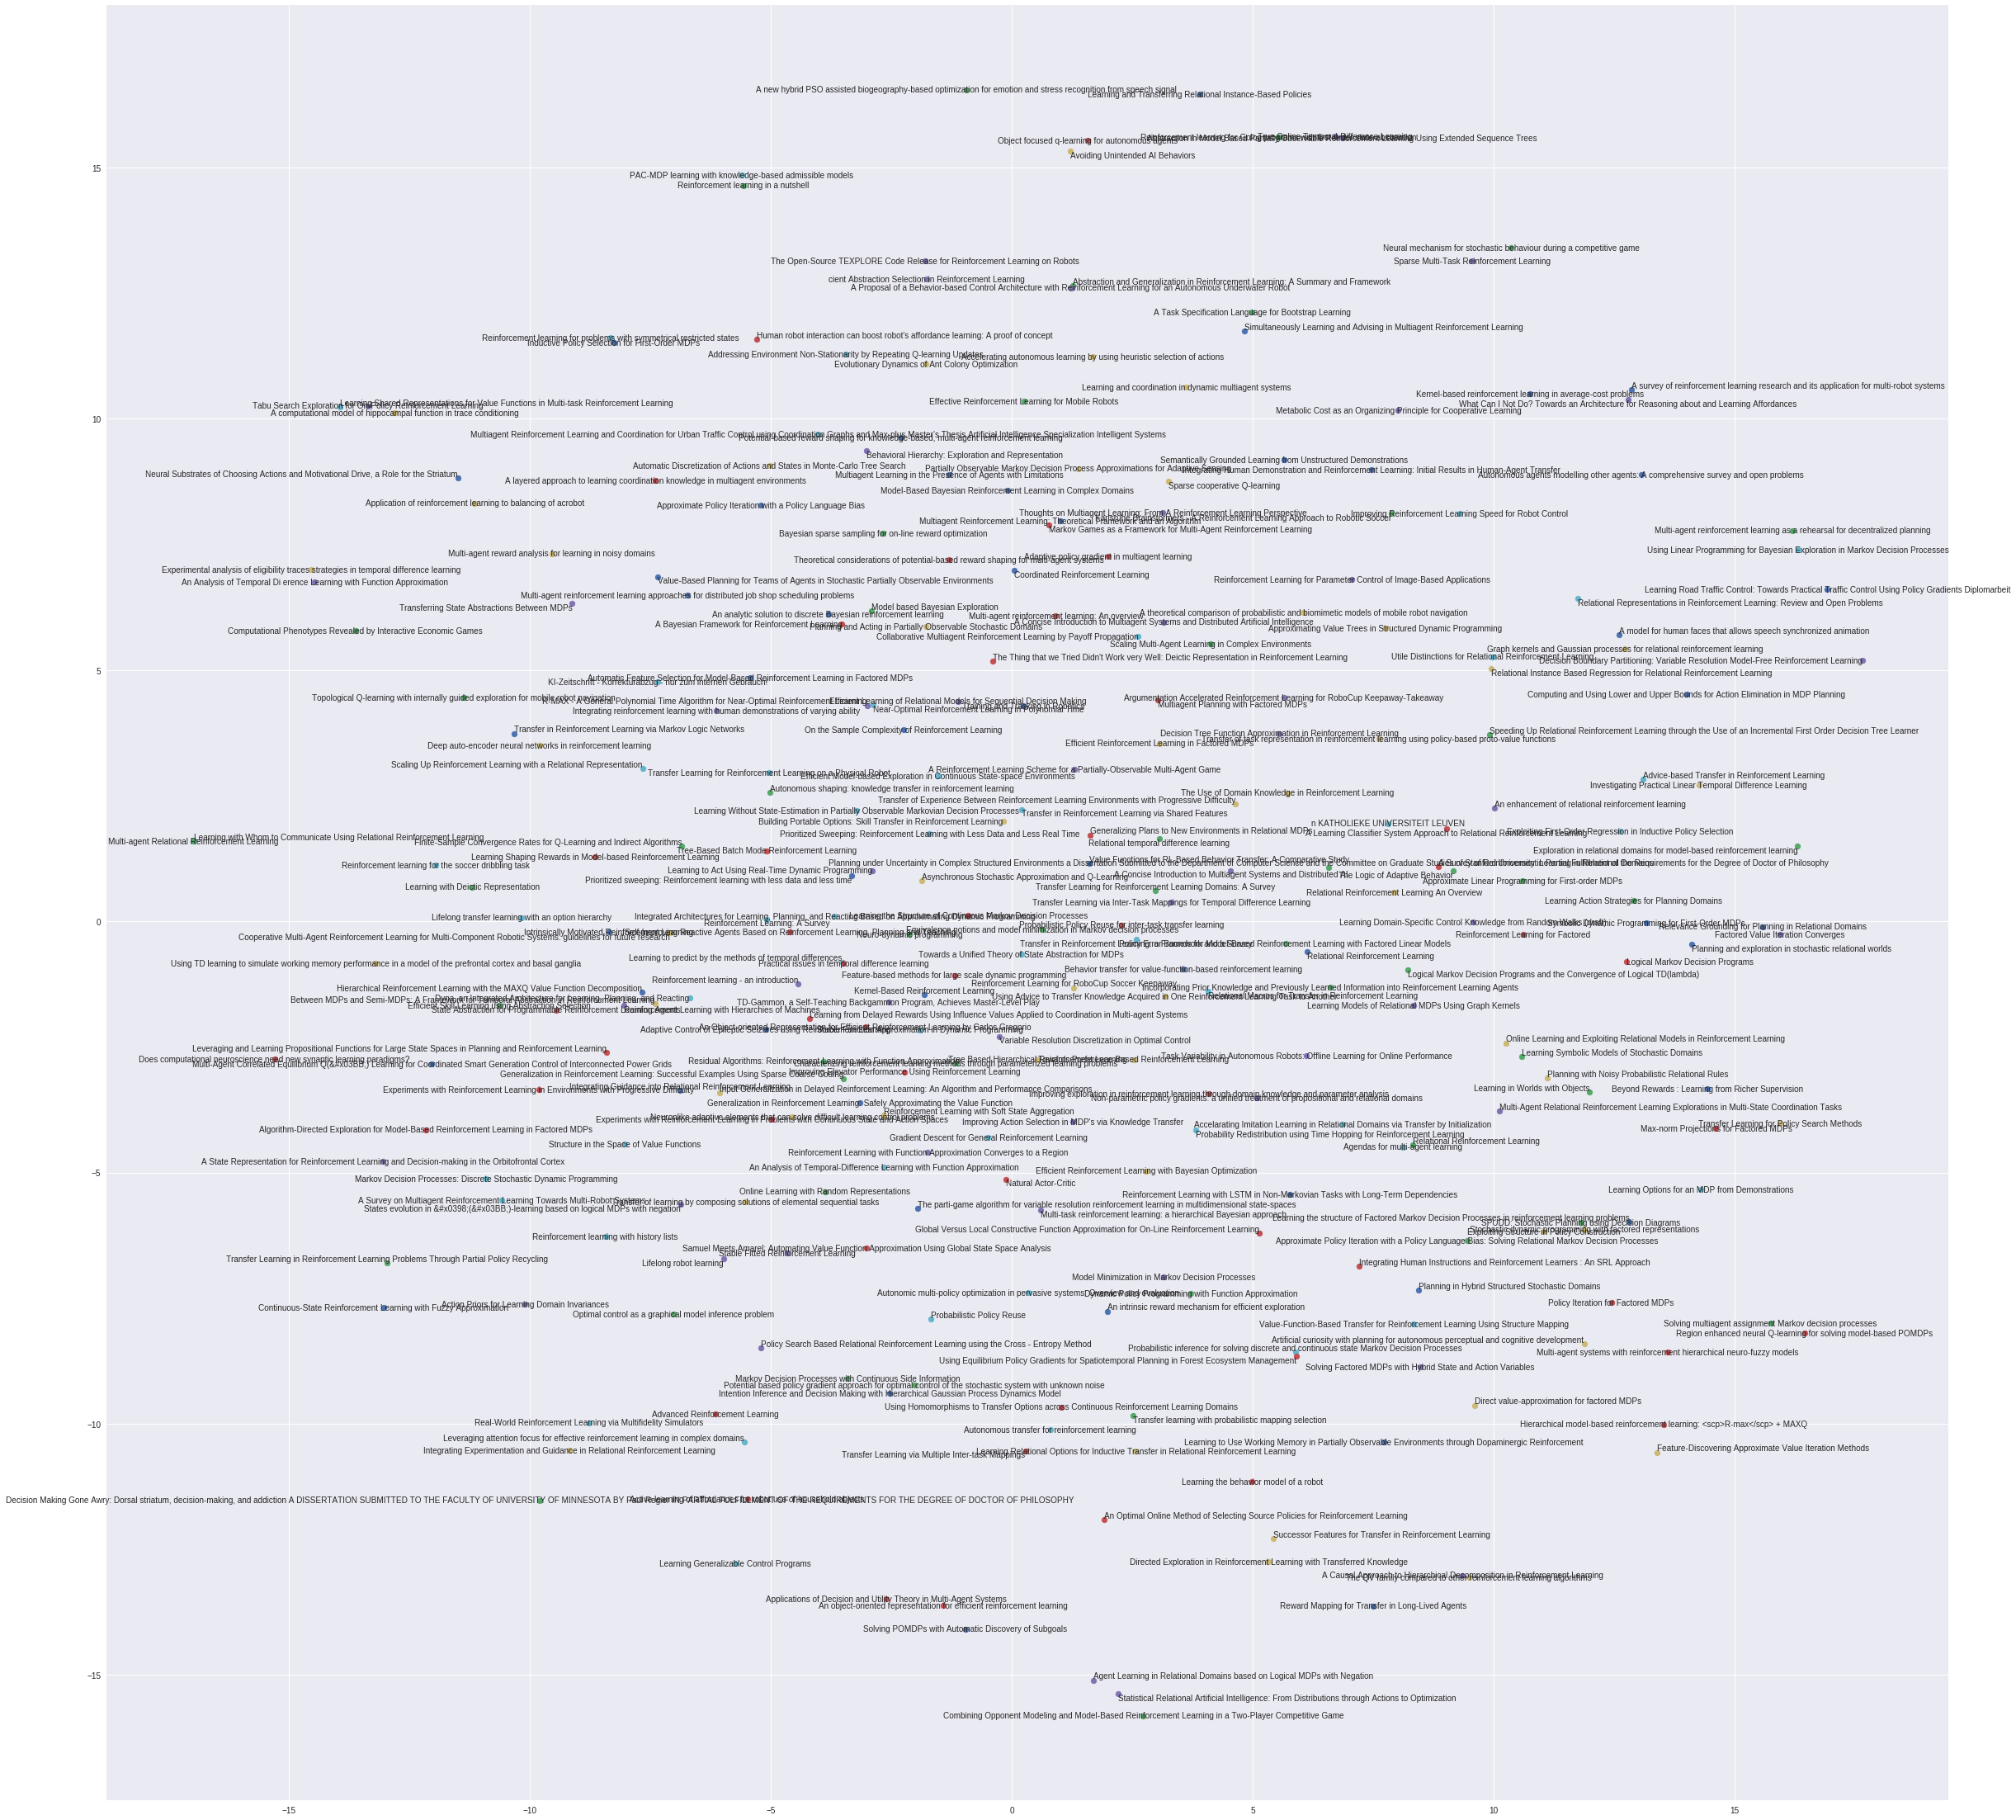

In [7]:
#Section 5

#Run this for a T-SNE map for the returned similar papers. Will take 15-18 minutes

for_TSNE = np.take(final_embeddings, nearestPapers, axis=0) 

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(for_TSNE)

texts = []

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pyplot.figure(figsize=(40, 40))  # in inches

  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pyplot.scatter(x, y)
    texts.append(pyplot.text(x, y, label))
  
  adjust_text(texts , arrowprops=dict(arrowstyle='->', color='#8f1402' ) ) 
  
  pyplot.show()


papers = [titleDict[i] for i in nearestPapers]
plot(two_d_embeddings, papers)


In [0]:

!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from numpy import genfromtxt

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)